In [31]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from matplotlib import pyplot as plt

In [32]:
rat_sightings = pd.read_csv("rat_sightings/rat_sightings.csv")

In [33]:
inspections = pd.read_csv("rodent_inspections/rodent-inspection.csv")

In [34]:
sightings_unique = rat_sightings["Borough"].unique()


In [35]:
sightings_unique[1]

'STATEN ISLAND'

In [36]:
rename = {}

for i in sightings_unique: 
    print (i)
    print (i.lower().capitalize())
    rename[i] = i.lower().capitalize()
rename ["Staten island"] = "Staten Island"

MANHATTAN
Manhattan
STATEN ISLAND
Staten island
BROOKLYN
Brooklyn
BRONX
Bronx
QUEENS
Queens
Unspecified
Unspecified


In [37]:
new_df = rat_sightings[["Borough","Unique Key"]].replace(to_replace = rename)
new_df["Borough"]
del (rat_sightings)

In [38]:
inspections.head()

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,BAIT,37453,PO199209,2,1011290002,1,1129,2,57,WEST 76 STREET,10023.0,991001.0,223260.0,40.779464,-73.975624,Manhattan,2010-11-18T12:50:18,Bait applied,2010-11-19T08:43:21,"{'latitude': '40.779464247848', 'longitude': '..."
1,BAIT,38432,PO199209,3,1011290002,1,1129,2,57,WEST 76 STREET,10023.0,991001.0,223260.0,40.779464,-73.975624,Manhattan,2010-12-02T10:44:16,Bait applied,2010-12-07T09:34:01,"{'latitude': '40.779464247848', 'longitude': '..."
2,BAIT,40616,PO174802,2,2028470001,2,2847,1,1,EAST MT EDEN AVENUE,10452.0,1007877.0,246889.0,40.844291,-73.914605,Bronx,2010-12-20T11:56:13,Bait applied,2010-12-28T15:16:07,"{'latitude': '40.844290674523', 'longitude': '..."
3,BAIT,41357,PO199209,4,1011290002,1,1129,2,57,WEST 76 STREET,10023.0,991001.0,223260.0,40.779464,-73.975624,Manhattan,2011-01-04T11:40:38,Bait applied,2011-01-06T15:04:17,"{'latitude': '40.779464247848', 'longitude': '..."
4,BAIT,41838,PO174802,3,2028470001,2,2847,1,1,EAST MT EDEN AVENUE,10452.0,1007877.0,246889.0,40.844291,-73.914605,Bronx,2011-01-10T10:08:18,Bait applied,2011-01-10T14:49:51,"{'latitude': '40.844290674523', 'longitude': '..."


In [39]:
inspections.rename(columns = {"BOROUGH":"Borough"}, inplace = True)
inspections.head()

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,Borough,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,BAIT,37453,PO199209,2,1011290002,1,1129,2,57,WEST 76 STREET,10023.0,991001.0,223260.0,40.779464,-73.975624,Manhattan,2010-11-18T12:50:18,Bait applied,2010-11-19T08:43:21,"{'latitude': '40.779464247848', 'longitude': '..."
1,BAIT,38432,PO199209,3,1011290002,1,1129,2,57,WEST 76 STREET,10023.0,991001.0,223260.0,40.779464,-73.975624,Manhattan,2010-12-02T10:44:16,Bait applied,2010-12-07T09:34:01,"{'latitude': '40.779464247848', 'longitude': '..."
2,BAIT,40616,PO174802,2,2028470001,2,2847,1,1,EAST MT EDEN AVENUE,10452.0,1007877.0,246889.0,40.844291,-73.914605,Bronx,2010-12-20T11:56:13,Bait applied,2010-12-28T15:16:07,"{'latitude': '40.844290674523', 'longitude': '..."
3,BAIT,41357,PO199209,4,1011290002,1,1129,2,57,WEST 76 STREET,10023.0,991001.0,223260.0,40.779464,-73.975624,Manhattan,2011-01-04T11:40:38,Bait applied,2011-01-06T15:04:17,"{'latitude': '40.779464247848', 'longitude': '..."
4,BAIT,41838,PO174802,3,2028470001,2,2847,1,1,EAST MT EDEN AVENUE,10452.0,1007877.0,246889.0,40.844291,-73.914605,Bronx,2011-01-10T10:08:18,Bait applied,2011-01-10T14:49:51,"{'latitude': '40.844290674523', 'longitude': '..."


In [54]:
df = pd.merge(new_df, inspections [["Borough","JOB_ID"]], how='outer', sort=True, on=["Borough"]
df.head()

SyntaxError: EOL while scanning string literal (<ipython-input-54-0cf35e6a0fc8>, line 1)

In [41]:
#sns.catplot(x="Borough", y="Incident Zip", hue="Unique Key", kind="swarm", data= df);
# sns.catplot(x="Borough", y="Incident Zip", kind="swarm", data=df)
df_2 = inspections[['Borough','JOB_ID']]
# df_2= df.groupby(['Borough']).count()
df_3= new_df.groupby(['Borough'],as_index=False).count().rename(columns={"Unique Key":"Total Sightings"})
#df_4 = df_3.pivot(columns="JOB_ID",index="Borough",values="Total Sightings").fillna(0.0)
#sns.heatmap(gp,cbar=False)
df_3

,Borough,Total Sightings
0,Bronx,20706
1,Brooklyn,34673
2,Manhattan,26803
3,Queens,14811
4,Staten Island,4920
5,Unspecified,1


In [42]:
# df_3.drop_duplicates(subset=["Borough","Total Sightings","Total Inspections"], keep=False)

In [43]:
df_4= df_2.groupby(['Borough'],as_index=False).count().rename(columns={"JOB_ID":"Total Inspections"})

In [44]:
df_4

,Borough,Total Inspections
0,Bronx,509644
1,Brooklyn,409150
2,Manhattan,541489
3,Queens,162584
4,Staten Island,48317


In [45]:
df = pd.merge(df_4, df_3, how='outer', sort=True, on=["Borough"])
df.head()

,Borough,Total Inspections,Total Sightings
0,Bronx,509644.0,20706
1,Brooklyn,409150.0,34673
2,Manhattan,541489.0,26803
3,Queens,162584.0,14811
4,Staten Island,48317.0,4920


In [52]:
sns.catplot(x="Borough", y=("Total Inspections", "Total Sightings"), kind="swarm", data=df)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

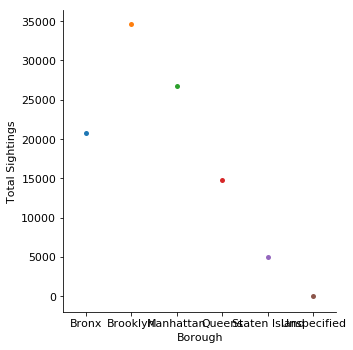

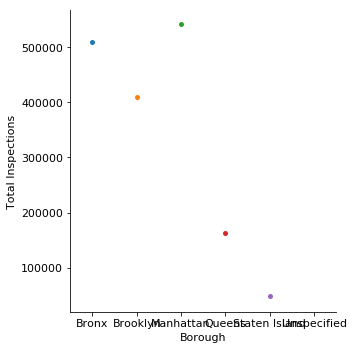

In [53]:
sns.catplot(x="Borough", y="Total Sightings", kind="swarm", data=df)
sns.catplot(x="Borough", y="Total Inspections", kind="swarm", data=df)

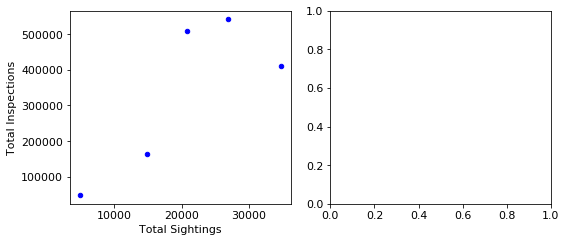

In [48]:
# plt.rcParams['font.size']=11
# plt.rcParams['figure.figsize']=[8.0, 3.5]
# fig, axes=plt.subplots(nrows=1, ncols=2)
# df.plot(kind='scatter', x='Total Sightings', y='Total Inspections', ax=axes[0], color='Blue');
# plt.tight_layout()

